In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 14})
np.random.seed(777)

#### Постановка:

Рассмотрим уравнения Шредингера 

$$
i\frac{\delta}{\delta t} \mid \psi \rangle =H(t) \mid \psi\rangle
$$

Где $H(t)= H_0\big (1 + A cos(t)\big )$, при этом $H_0$ – матрица из гауссова унитарного пространства, $A$ – коэффициент модуляции, $T$ – период. Тогда решение будет выглядеть как $\psi(t)= ei\int H(t)dt \psi(0)$

По теореме Флоке решение может быть разложено по полному набору функций:
$$\mid C_k(t)\rangle= e^{−i\theta _kt\mid \varphi k(t)} \rangle$$

Где $\theta _k$ – не зависят от времени, а векторы $\mid \varphi k(t) \rangle$ – периодические с периодом $T$. В начальный момент времени $t = t_0$, далее полагаем $t_0=0$, если иное не оговорено специально, векторы $\mid \varphi k(t)\rangle$ могут быть найдены путем решения уравнения $\Pi(T)\mid \varphi _k(0)\rangle= e^{−i\theta _kt\mid \varphi k(t)} \rangle$

Данное уравнение является задачей на собственные числа и собственные вектора некоторой матрицы $\Pi(T)$ - генератор эволюции на периоде $T$. Матрицу $\Pi(T)$ можно найти численным интегрированием системы линейных уравнений 
$$
\begin{cases}
i \frac{\delta \psi}{ \delta t}=H(T)\psi(0) \\
|\psi|^2=1
\end{cases}
$$

$N$ раз из разных начальных условий. Затем собственные числа будут определяться из того, что $\psi (0)\rangle= \varphi _k\rangle$, следовательно $\lambda _k \mid \varphi _k \rangle = \Pi \mid \varphi _k \rangle$, с другой стороны, по теореме Флоке $\mid \psi(t)\rangle= e^{−i\theta _k(t)\mid \varphi k(t)} \rangle$, $\Pi |\varphi _k \rangle= |\psi(T)\rangle e^{−i\theta _k(t)}\mid |\varphi _k(t)\rangle= \lambda _k|\varphi _k \rangle$, тогда 

$$
\lambda _k= e^{−i\theta _kT}
$$

Собственные числа должны быть на единичной окружности комплексной плоскости. Тогда в качестве контроля точности найденных собственных чисел можно принять величину $|\lambda _k|−1$.

#### Задание:
1. Сгенерировать матрицу генератора эволюции $\Pi(T)$
2. Найдены и построить на комплекстной плоскости собственные числа этой матрицы.
3. Построить график точности найденных собственных чисел.


#### Решение:

In [42]:
def runge(f, y0, h, n):
    y = y0.ravel()
    
    for i in range(1, n):
        k1 = f(i*h, y)
        k2 = f(i*h + h/2, y + h/2*k1)
        k3 = f(i*h + h/2, y + h/2*k2)
        k4 = f(i*h + h, y + h*k3)
    
        y = y + h/6*(k1 + 2*k2 + 2*k3 + k4)
    return y

Генерация матрицы генератора эволюци $\Pi (T)$:

In [44]:
def generate_random_hermite(n):
    B = np.random.normal(0.0, 1.0, (n, n))
    C = np.random.normal(0.0, 1.0, (n, n))
    D = np.matrix(B + 1j * C)
    A = (D + D.H)*0.5
    return A

def generete_propagator(n, A):
    H_0 = generate_random_hermite(n)
    f = lambda t, x: (H_0 * (1.0 + A * np.cos(t)) * x.reshape(np.size(x), 1) * 1j).ravel()
    T = 2 * np.pi
    dt = 1e-2
    P = [[]]*n
    for i in range(n):
        psi_0 = np.zeros(n)
        psi_0[i] = 1.
        n_iter = int(T / dt)
        P[i] = runge(f, psi_0, dt, n_iter)
    return np.matrix(np.array(P).reshape(n, n)).T

generete_propagator(3, 0)

matrix([[ 0.01665155+0.22993045j,  0.06048573+0.45921299j,
         -0.47021568-0.71499429j],
        [-0.31083432+0.6074175j , -0.5900565 +0.01584614j,
         -0.27703197+0.3305473j ],
        [ 0.61401606-0.3229009j , -0.61522555-0.24196001j,
         -0.2548004 -0.12941759j]])

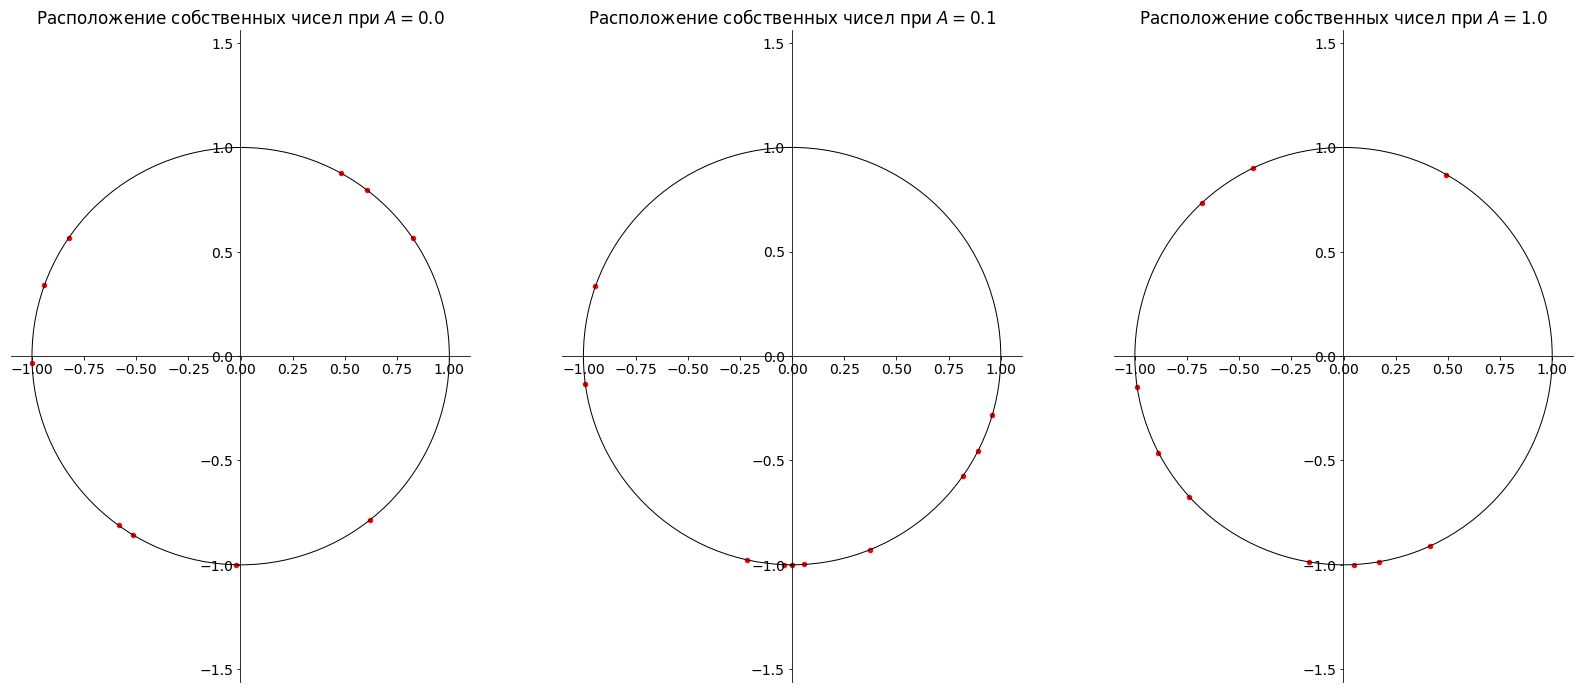

In [67]:
n = 10
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(28,12), sharex=True)
for A, ax in ((0.0, ax1), (0.1, ax2), (1.0, ax3)):
    propagator = generete_propagator(n, A)
    eigenvalues, _ = np.linalg.eig(propagator)
    ax.axis('equal')
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    circle = plt.Circle((0, 0), 1.0, color='black', fill=False)
    ax.add_patch(circle)
    ax.scatter(eigenvalues.real, eigenvalues.imag, c='r', s=20)
    ax.set_title(r'Расположение собственных чисел при $A= {}$'.format(A))

Видно, что красные точки, которые соответствуют собственным числам лежат на единичной оружности. При $A=0$ видно, что модуляции нет, при $A=0.1$ заметна слабая модуляция и при $A=1$ наблюдается сильная модуляция.

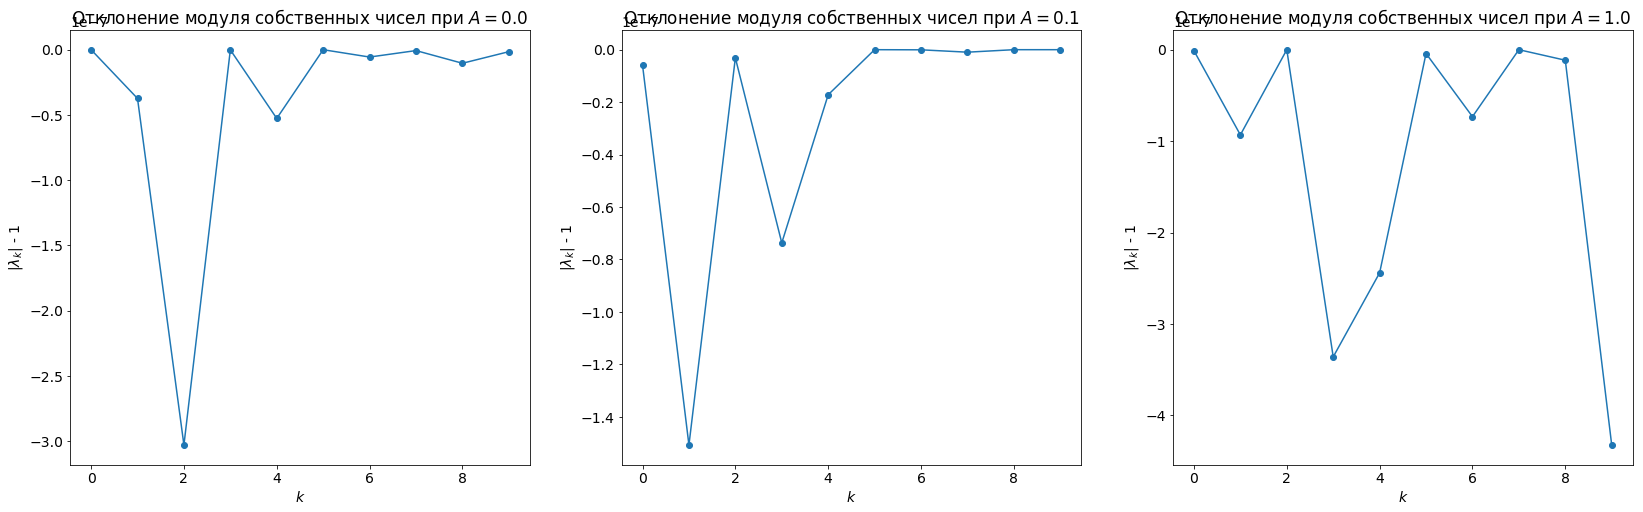

In [75]:
n = 10
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(28,8), sharex=True)
for A, ax in ((0.0, ax1), (0.1, ax2), (1.0, ax3)):
    propagator = generete_propagator(n, A)
    eigenvalues, _ = np.linalg.eig(propagator)
    error = np.abs(eigenvalues) - 1
    ax.plot(error, marker="o")
    ax.set_xlabel(r'$k$')
    ax.set_ylabel(r'$|\lambda_k|$ - 1')
    ax.set_title(r'Отклонение модуля собственных чисел при $A= {}$'.format(A))

Видим малое отклонение модуля собственных чисел от единицы.